In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




df = pd.read_csv("Salary_Data.csv")

#  'df' DataFrame
df.head()
#df.info()
#df.describe()



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


In [3]:
df.rename(columns={'Education Level': 'education', 'Job Title': 'job', 'Years of Experience': 'xp',
                   'Age': 'age', 'Gender': 'gender', 
                   'Salary': 'salary'}, inplace=True)

In [4]:
df["education"].value_counts(dropna=False)

education
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
NaN                     3
phD                     1
Name: count, dtype: int64

In [5]:
df["education"].replace("Bachelor's Degree", "Bachelor", inplace=True)
df["education"].replace("Bachelor's", "Bachelor", inplace=True)
df["education"].replace("Master's Degree", "Master", inplace=True)
df["education"].replace("Master's", "Master", inplace=True)
df["education"].replace("phD", "PhD", inplace=True)

df["education"].value_counts(dropna=False)

education
Bachelor       3023
Master         1861
PhD            1369
High School     448
NaN               3
Name: count, dtype: int64

In [6]:
df.isnull().sum()

age          2
gender       2
education    3
job          2
xp           3
salary       5
dtype: int64

In [7]:
for column in df.columns:
    if df[column].isnull().any():
        df = df.dropna(subset=[column])

In [8]:
df.isnull().sum()

age          0
gender       0
education    0
job          0
xp           0
salary       0
dtype: int64

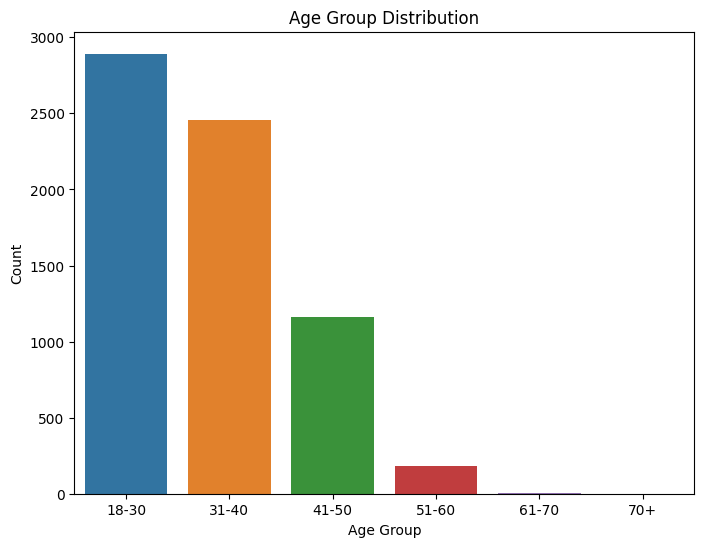

In [9]:

#age groups
bins = [18 ,30, 40, 50, 60, 70, float("inf") ]
labels =  ["18-30", "31-40", "41-50", "51-60","61-70", "70+" ]

# Assign age group labels to each row based on the 'age' column
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

# Count the occurrences of each age group
age_counts = df['age_group'].value_counts()

# Create bar plot using matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, order=labels)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

In [10]:
df.head()

,age,gender,education,job,xp,salary,age_group
0,32.0,Male,Bachelor,Software Engineer,5.0,90000.0,31-40
1,28.0,Female,Master,Data Analyst,3.0,65000.0,18-30
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,41-50
3,36.0,Female,Bachelor,Sales Associate,7.0,60000.0,31-40
4,52.0,Male,Master,Director,20.0,200000.0,51-60


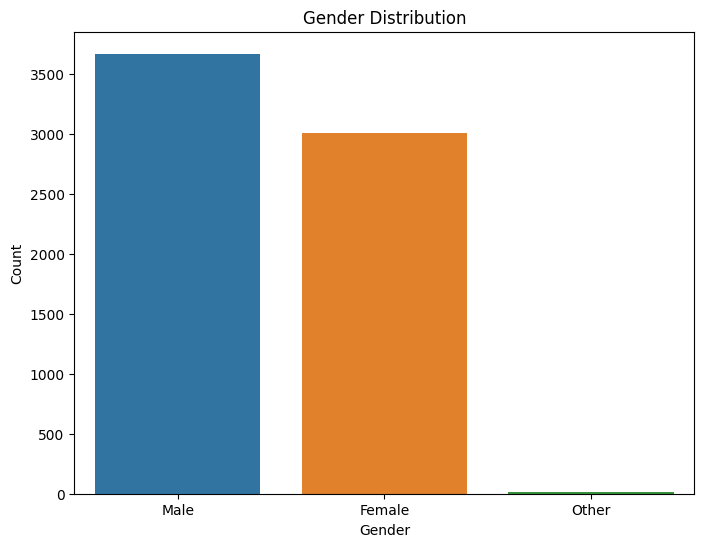

In [11]:
#gender groups
# Count the occurrences of each gender category
gender_counts = df['gender'].value_counts()

# Create bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

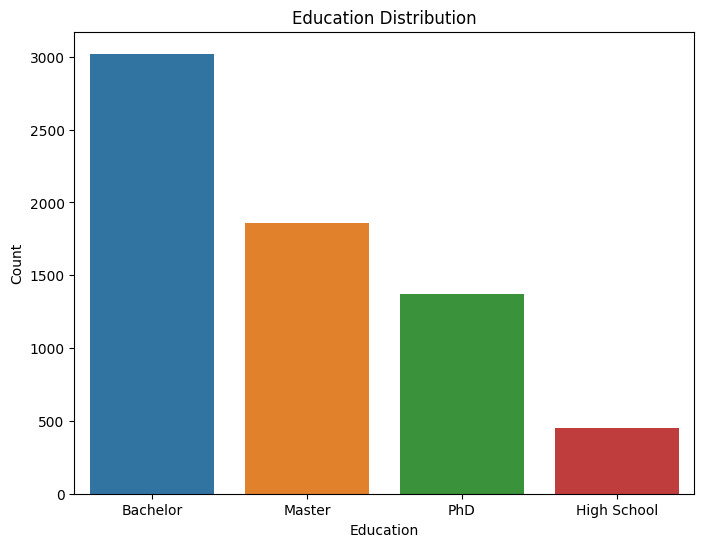

In [12]:

# Count the occurrences of each education category
edu_counts = df['education'].value_counts()

# Create bar plot using seaborn with ascending order
plt.figure(figsize=(8, 6))
sns.barplot(x=edu_counts.index, y=edu_counts.values)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

In [13]:
print (df["salary"]) 

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: salary, Length: 6698, dtype: float64


In [14]:
salary = df["salary"] /1000

print (salary) 

0        90.0
1        65.0
2       150.0
3        60.0
4       200.0
        ...  
6699    200.0
6700     50.0
6701     55.0
6702    140.0
6703     35.0
Name: salary, Length: 6698, dtype: float64


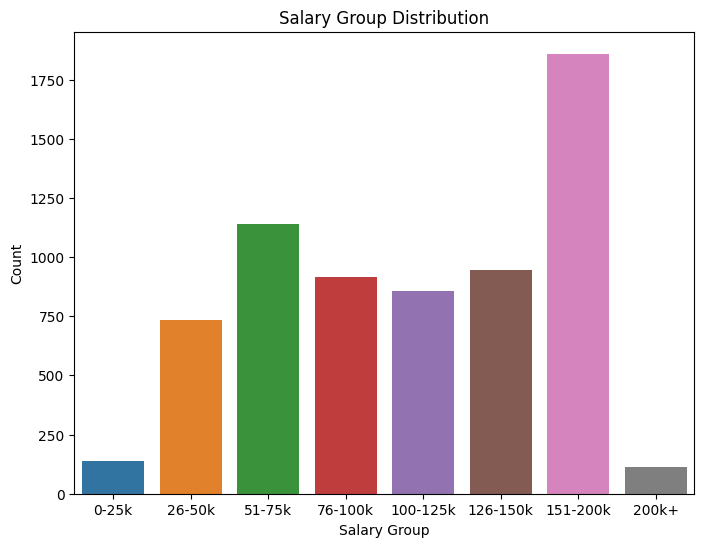

In [15]:
#salary groups

bins = [0,25,50, 75, 100, 125, 150, 200, float("inf")]
labels =  [ "0-25k", "26-50k", "51-75k", "76-100k","100-125k", "126-150k", "151-200k" , "200k+"]

# Assign salary group labels to each row based on the 'salary' column
df["salary_group"] = pd.cut(df["salary"]/1000, bins=bins, labels=labels)

# Count the occurrences of each salary group
salary_counts = df["salary_group"].value_counts()

# Create bar plot using matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x=salary_counts.index, y=salary_counts.values, order=labels)
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.title('Salary Group Distribution')
plt.show()

In [16]:
print(df.columns)

Index(['age', 'gender', 'education', 'job', 'xp', 'salary', 'age_group',
       'salary_group'],
      dtype='object')


In [17]:
df.head()

,age,gender,education,job,xp,salary,age_group,salary_group
0,32.0,Male,Bachelor,Software Engineer,5.0,90000.0,31-40,76-100k
1,28.0,Female,Master,Data Analyst,3.0,65000.0,18-30,51-75k
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,41-50,126-150k
3,36.0,Female,Bachelor,Sales Associate,7.0,60000.0,31-40,51-75k
4,52.0,Male,Master,Director,20.0,200000.0,51-60,151-200k


In [18]:
print (df.head())

    age  gender education                job    xp    salary age_group  \
0  32.0    Male  Bachelor  Software Engineer   5.0   90000.0     31-40   
1  28.0  Female    Master       Data Analyst   3.0   65000.0     18-30   
2  45.0    Male       PhD     Senior Manager  15.0  150000.0     41-50   
3  36.0  Female  Bachelor    Sales Associate   7.0   60000.0     31-40   
4  52.0    Male    Master           Director  20.0  200000.0     51-60   

  salary_group  
0      76-100k  
1       51-75k  
2     126-150k  
3       51-75k  
4     151-200k  


In [19]:
df.isnull().sum()

age             0
gender          0
education       0
job             0
xp              0
salary          0
age_group       0
salary_group    0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = df.copy()

dummy_features = ["gender", "age", "education", "job", "xp"]
y_dummy =  df["salary_group"]
X_dummy = df[dummy_features]





# Split the dataset into training and testing sets
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y_dummy, test_size =.2,  random_state=42)



decoded_df = df.copy()

label = LabelEncoder()

columns_to_encode = ["gender", "education", "job", "xp"]

df[columns_to_encode] = df[columns_to_encode].apply(label.fit_transform)

print(df.head())


    age  gender  education  job  xp    salary age_group salary_group
0  32.0       1          0  175   7   90000.0     31-40      76-100k
1  28.0       0          2   18   5   65000.0     18-30       51-75k
2  45.0       1          3  144  17  150000.0     41-50     126-150k
3  36.0       0          0  115   9   60000.0     31-40       51-75k
4  52.0       1          2   25  22  200000.0     51-60     151-200k


In [21]:
print (y_test_dummy.head())

1883    126-150k
2630     76-100k
498      76-100k
5973      51-75k
4108     76-100k
Name: salary_group, dtype: category
Categories (8, object): ['0-25k' < '26-50k' < '51-75k' < '76-100k' < '100-125k' < '126-150k' < '151-200k' < '200k+']


In [22]:
print (X_dummy.head())

   gender   age education                job    xp
0    Male  32.0  Bachelor  Software Engineer   5.0
1  Female  28.0    Master       Data Analyst   3.0
2    Male  45.0       PhD     Senior Manager  15.0
3  Female  36.0  Bachelor    Sales Associate   7.0
4    Male  52.0    Master           Director  20.0


In [23]:
print (X_dummy.education)

0          Bachelor
1            Master
2               PhD
3          Bachelor
4            Master
           ...     
6699            PhD
6700    High School
6701       Bachelor
6702         Master
6703    High School
Name: education, Length: 6698, dtype: object


In [24]:
print (df.education)

0       0
1       2
2       3
3       0
4       2
       ..
6699    3
6700    1
6701    0
6702    2
6703    1
Name: education, Length: 6698, dtype: int64


In [25]:
y = df.salary
print(df.salary)

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: salary, Length: 6698, dtype: float64


In [26]:
print (df.columns)


Index(['age', 'gender', 'education', 'job', 'xp', 'salary', 'age_group',
       'salary_group'],
      dtype='object')


In [27]:
features = ["gender", "age", "education", "job", "xp"]

X = df[features]
decoded_X = decoded_df[features]

In [28]:
X.describe()

,gender,age,education,job,xp
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000
mean,0.552254,33.623022,1.235443,94.135712,9.977605
std,0.501485,7.615784,1.221094,58.447910,6.213376
min,0.000000,21.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,0.000000,42.250000,5.000000
50%,1.000000,32.000000,1.000000,96.000000,9.000000
75%,1.000000,38.000000,2.000000,158.000000,14.000000
max,2.000000,62.000000,3.000000,190.000000,36.000000


In [29]:
X.head()


,gender,age,education,job,xp
0,1,32.0,0,175,7
1,0,28.0,2,18,5
2,1,45.0,3,144,17
3,0,36.0,0,115,9
4,1,52.0,2,25,22


In [30]:
# Machine Learning  

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Create the salary groups
labels = ["0-25k", "26-50k", "51-75k", "76-100k", "100-125k", "126-150k", "151-200k", "200k+"] 
df['salary_group'] = pd.cut(df['salary'], bins=[0, 25000, 50000, 75000, 100000, 125000, 150000, 200000, float('inf')], labels=labels)



features = ["gender", "age","job", "education","xp"]

y = df["salary_group"]

X = df[features]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 





# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size =.2,  random_state=42)






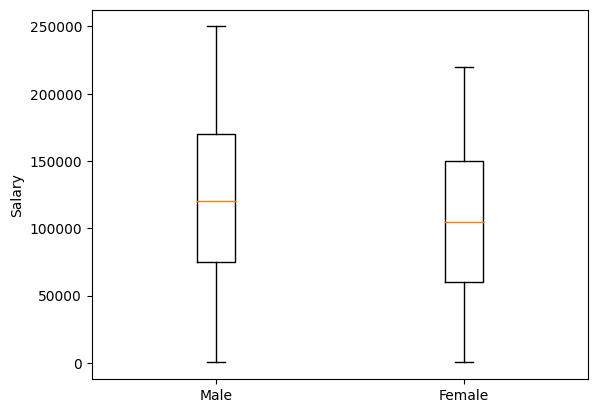

In [32]:
# Set up the figure and axes
fig, ax = plt.subplots()

# Create the box plot using Matplotlib
ax.boxplot([data[data['gender'] == 'Male']['salary'],
            data[data['gender'] == 'Female']['salary']])

# Set the x-axis labels
ax.set_xticklabels(['Male', 'Female'])

# Set the y-axis label
ax.set_ylabel('Salary')

# Show the plot
plt.show()


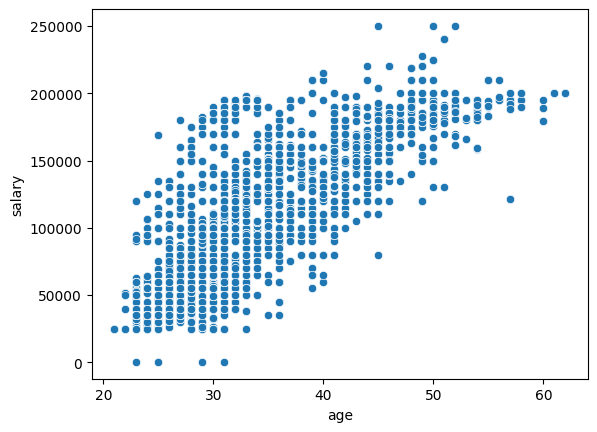

In [33]:
sns.scatterplot(x="age", y="salary", data=df)

# Show the plot
plt.show()

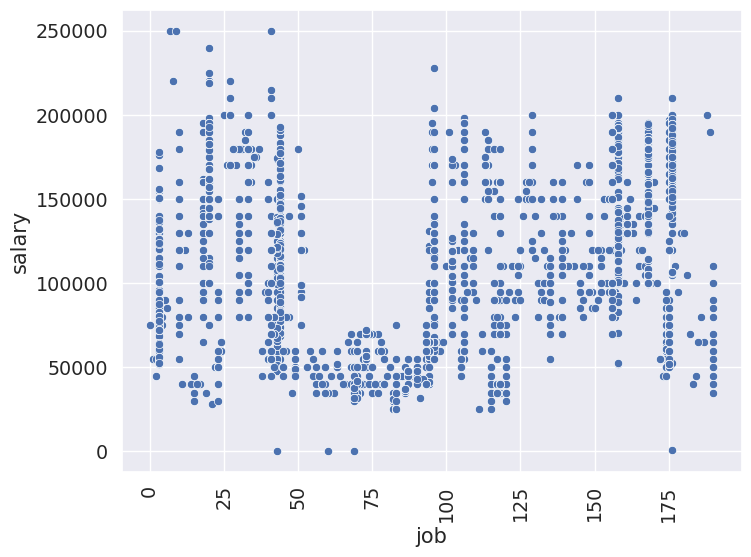

In [34]:
plt.figure(figsize=(8, 6))  # Adjust the dimensions as needed
sns.set(font_scale=1.25)  # Adjust the font size as needed

sns.scatterplot(x= X.job, y="salary", data=df)
plt.xticks(rotation=90)

# Show the plot
plt.show()

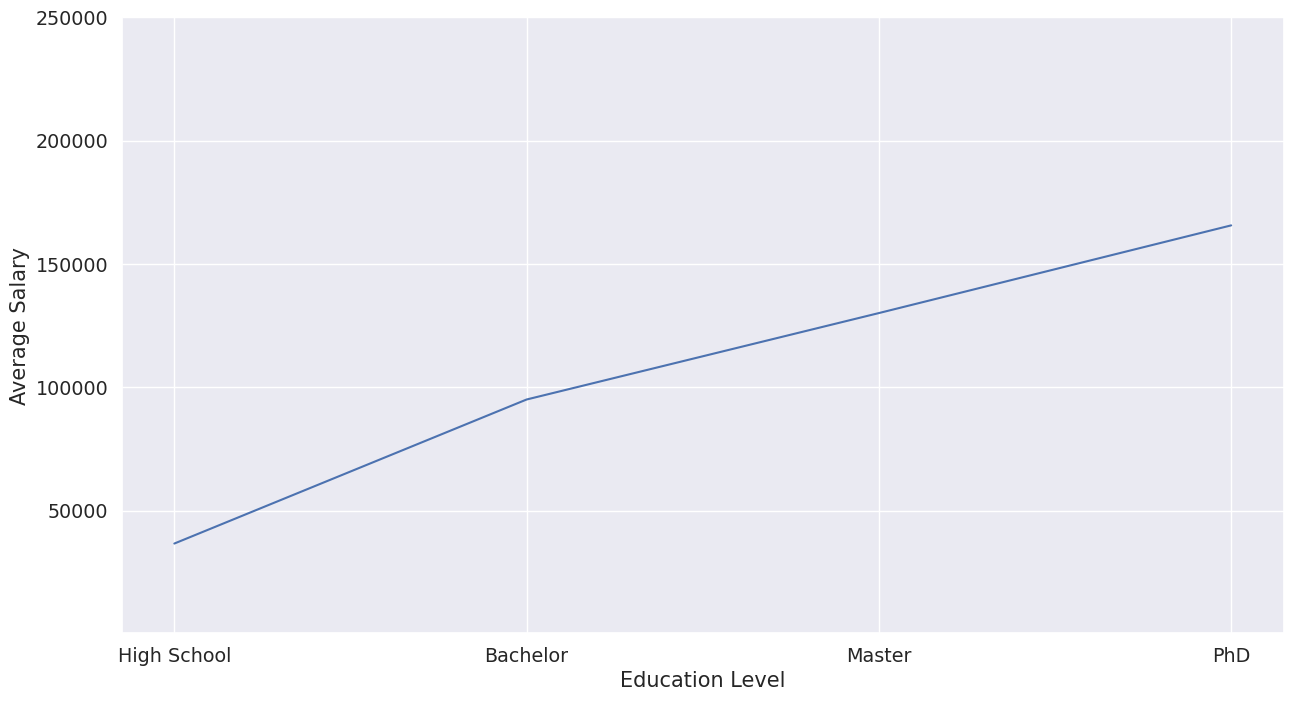

In [35]:
import numpy as np

#data =df.copy()


# Create a = dictionary for education levels
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}

# Convert education categories to numeric values
data['education_numeric'] = data['education'].map(education_mapping)

# Group the data by education level and calculate the average salary
average_salary_by_education = data.groupby('education_numeric')['salary'].mean().reset_index()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15,8))

# Specify the x-axis values and labels
x_values = average_salary_by_education['education_numeric']
x_labels = [label for label in education_mapping.keys()]

# Create the line plot using Matplotlib
ax.plot(x_values, average_salary_by_education['salary'])

# Set the x-axis and y-axis labels
ax.set_xlabel('Education Level')
ax.set_ylabel('Average Salary')

# Set the x-axis tick locations and labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)

# Set the y-axis limits from the minimum to maximum salary values

ax.set_ylim(data['salary'].min(), data['salary'].max())

# Show the plot
plt.show()

In [36]:
#Clustering and Classification 

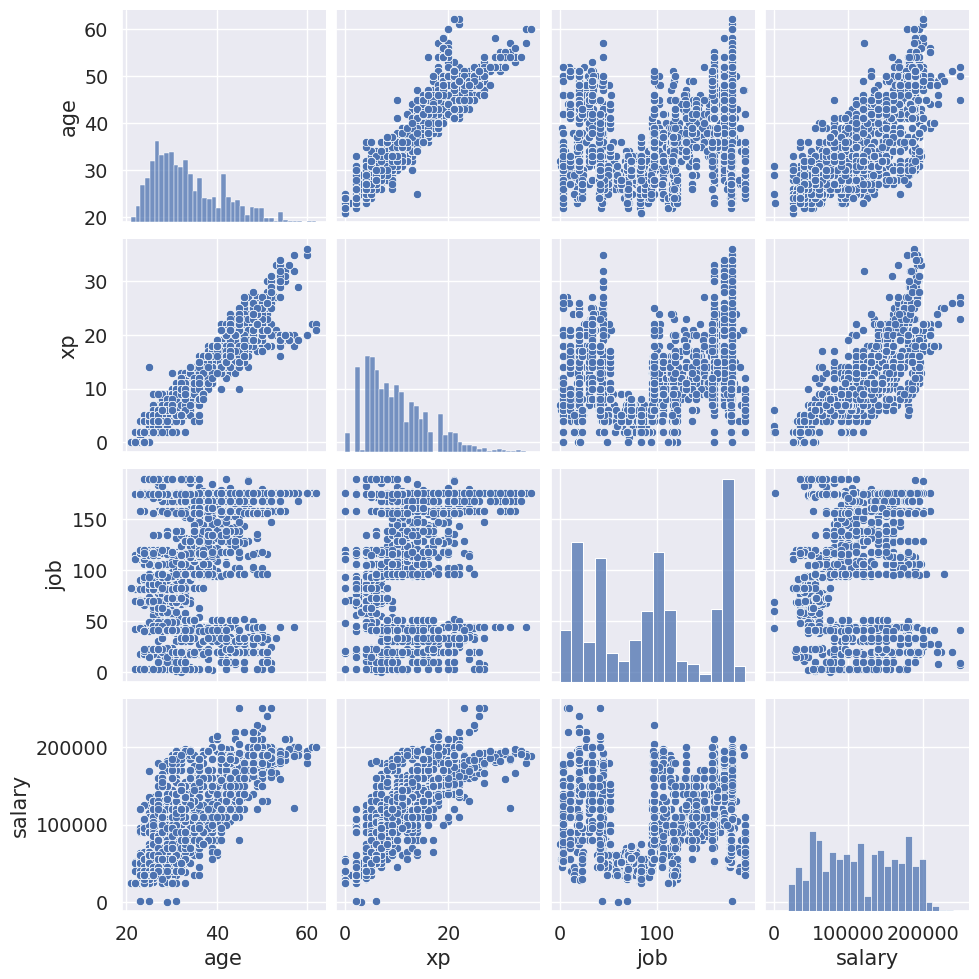

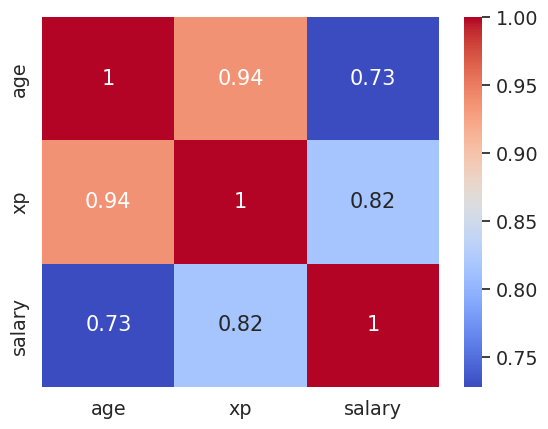

In [37]:
sns.pairplot(df[['age', 'xp',"job", "salary"]])
plt.show()

# Correlation matrix heatmap
correlation_matrix = df[['age', 'xp', 'salary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [38]:
from sklearn.cluster import KMeans

# Assuming you want to perform clustering using age and experience columns

# Create and fit the K-means model with desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(X)

# Access the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

print (cluster_labels)

[1 2 1 ... 2 0 0]


In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.BatchNormalization(),
  
    tf.keras.layers.Dense(128, activation='gelu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(500, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    
    tf.keras.layers.Dense(len(labels), activation='softmax'),

])

#compile and fit
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_logs = "model_logs/" 
tensorboard_callback = TensorBoard(log_dir=model_logs, histogram_freq=1)

model.fit(X_train, y_train, epochs=1500, batch_size=200, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/1500
27/27 [==============================] - 1s 13ms/step - loss: 1.2987 - accuracy: 0.5261 - val_loss: 2.8363 - val_accuracy: 0.2276
Epoch 2/1500
27/27 [==============================] - 0s 8ms/step - loss: 0.9653 - accuracy: 0.6250 - val_loss: 2.3314 - val_accuracy: 0.2254
Epoch 3/1500
27/27 [==============================] - 0s 8ms/step - loss: 0.8893 - accuracy: 0.6536 - val_loss: 2.1845 - val_accuracy: 0.2649
Epoch 4/1500
27/27 [==============================] - 0s 8ms/step - loss: 0.8299 - accuracy: 0.6807 - val_loss: 2.0160 - val_accuracy: 0.2799
Epoch 5/1500
27/27 [==============================] - 0s 9ms/step - loss: 0.7804 - accuracy: 0.6969 - val_loss: 1.7561 - val_accuracy: 0.3507
Epoch 6/1500
27/27 [==============================] - 0s 8ms/step - loss: 0.7507 - accuracy: 0.7148 - val_loss: 1.4572 - val_accuracy: 0.4112
Epoch 7/1500
27/27 [==============================] - 0s 9ms/step - loss: 0.7044 - accuracy: 0.7436 - val_loss: 1.4122 - val_accuracy: 0.4530
Epoch

27/27 [==============================] - 0s 10ms/step - loss: 0.3046 - accuracy: 0.8852 - val_loss: 0.4874 - val_accuracy: 0.8261
Epoch 59/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2931 - accuracy: 0.8903 - val_loss: 0.5025 - val_accuracy: 0.8321
Epoch 60/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2966 - accuracy: 0.8819 - val_loss: 0.5359 - val_accuracy: 0.8157
Epoch 61/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.3230 - accuracy: 0.8733 - val_loss: 0.6359 - val_accuracy: 0.7910
Epoch 62/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2928 - accuracy: 0.8867 - val_loss: 0.4786 - val_accuracy: 0.8388
Epoch 63/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2890 - accuracy: 0.8890 - val_loss: 0.5866 - val_accuracy: 0.8022
Epoch 64/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2853 - accuracy: 0.8918 - val_loss: 0.4977 - val_accuracy: 0.8351
Epoch 

Epoch 115/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2064 - accuracy: 0.9166 - val_loss: 0.5780 - val_accuracy: 0.8201
Epoch 116/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1929 - accuracy: 0.9250 - val_loss: 0.4326 - val_accuracy: 0.8672
Epoch 117/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2094 - accuracy: 0.9197 - val_loss: 0.5520 - val_accuracy: 0.8239
Epoch 118/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1988 - accuracy: 0.9216 - val_loss: 0.4582 - val_accuracy: 0.8724
Epoch 119/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2067 - accuracy: 0.9179 - val_loss: 0.4443 - val_accuracy: 0.8724
Epoch 120/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.2224 - accuracy: 0.9099 - val_loss: 0.4220 - val_accuracy: 0.8754
Epoch 121/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1957 - accuracy: 0.9268 - val_loss: 0.4120 - val_ac

27/27 [==============================] - 0s 10ms/step - loss: 0.1359 - accuracy: 0.9485 - val_loss: 0.4204 - val_accuracy: 0.8791
Epoch 228/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1382 - accuracy: 0.9442 - val_loss: 0.4283 - val_accuracy: 0.8821
Epoch 229/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1390 - accuracy: 0.9444 - val_loss: 0.4277 - val_accuracy: 0.8866
Epoch 230/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1368 - accuracy: 0.9448 - val_loss: 0.5489 - val_accuracy: 0.8455
Epoch 231/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1371 - accuracy: 0.9461 - val_loss: 0.4850 - val_accuracy: 0.8731
Epoch 232/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1507 - accuracy: 0.9390 - val_loss: 0.4839 - val_accuracy: 0.8664
Epoch 233/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1511 - accuracy: 0.9390 - val_loss: 0.5215 - val_accuracy: 0.8604


27/27 [==============================] - 0s 10ms/step - loss: 0.1190 - accuracy: 0.9520 - val_loss: 0.5054 - val_accuracy: 0.8672
Epoch 340/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1146 - accuracy: 0.9520 - val_loss: 0.5573 - val_accuracy: 0.8619
Epoch 341/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1429 - accuracy: 0.9414 - val_loss: 0.4747 - val_accuracy: 0.8903
Epoch 342/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1244 - accuracy: 0.9507 - val_loss: 0.4259 - val_accuracy: 0.8918
Epoch 343/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1239 - accuracy: 0.9520 - val_loss: 0.4912 - val_accuracy: 0.8687
Epoch 344/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1293 - accuracy: 0.9448 - val_loss: 0.7046 - val_accuracy: 0.8261
Epoch 345/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1330 - accuracy: 0.9448 - val_loss: 0.5935 - val_accuracy: 0.8269


27/27 [==============================] - 0s 10ms/step - loss: 0.1013 - accuracy: 0.9573 - val_loss: 0.4530 - val_accuracy: 0.8955
Epoch 452/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1019 - accuracy: 0.9586 - val_loss: 0.4822 - val_accuracy: 0.8918
Epoch 453/1500
27/27 [==============================] - 0s 9ms/step - loss: 0.1102 - accuracy: 0.9539 - val_loss: 0.4613 - val_accuracy: 0.8873
Epoch 454/1500
27/27 [==============================] - 0s 9ms/step - loss: 0.1115 - accuracy: 0.9558 - val_loss: 0.4818 - val_accuracy: 0.8716
Epoch 455/1500
27/27 [==============================] - 0s 9ms/step - loss: 0.1400 - accuracy: 0.9434 - val_loss: 0.5406 - val_accuracy: 0.8493
Epoch 456/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.1253 - accuracy: 0.9487 - val_loss: 0.5848 - val_accuracy: 0.8575
Epoch 457/1500
27/27 [==============================] - 0s 9ms/step - loss: 0.1146 - accuracy: 0.9526 - val_loss: 0.4745 - val_accuracy: 0.8821
Epoc

Epoch 508/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1158 - accuracy: 0.9520 - val_loss: 0.6577 - val_accuracy: 0.8530
Epoch 509/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1202 - accuracy: 0.9515 - val_loss: 0.8587 - val_accuracy: 0.7993
Epoch 510/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1134 - accuracy: 0.9537 - val_loss: 0.6051 - val_accuracy: 0.8731
Epoch 511/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1144 - accuracy: 0.9541 - val_loss: 0.4953 - val_accuracy: 0.8873
Epoch 512/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1201 - accuracy: 0.9505 - val_loss: 0.4571 - val_accuracy: 0.8858
Epoch 513/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1103 - accuracy: 0.9541 - val_loss: 0.4765 - val_accuracy: 0.8888
Epoch 514/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1047 - accuracy: 0.9567 - val_loss: 0.5604 - val_ac

27/27 [==============================] - 0s 10ms/step - loss: 0.1041 - accuracy: 0.9554 - val_loss: 0.5601 - val_accuracy: 0.8612
Epoch 621/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1077 - accuracy: 0.9571 - val_loss: 0.4880 - val_accuracy: 0.8910
Epoch 622/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1023 - accuracy: 0.9576 - val_loss: 0.5366 - val_accuracy: 0.8694
Epoch 623/1500
27/27 [==============================] - 0s 10ms/step - loss: 0.1308 - accuracy: 0.9483 - val_loss: 0.8340 - val_accuracy: 0.8328
Epoch 624/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1216 - accuracy: 0.9520 - val_loss: 0.5153 - val_accuracy: 0.8694
Epoch 625/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1475 - accuracy: 0.9429 - val_loss: 0.5138 - val_accuracy: 0.8761
Epoch 626/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1059 - accuracy: 0.9578 - val_loss: 0.4785 - val_accuracy: 0.8963


27/27 [==============================] - 0s 13ms/step - loss: 0.1053 - accuracy: 0.9565 - val_loss: 0.5823 - val_accuracy: 0.8784
Epoch 733/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.1157 - accuracy: 0.9560 - val_loss: 0.5000 - val_accuracy: 0.8881
Epoch 734/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1013 - accuracy: 0.9573 - val_loss: 0.5169 - val_accuracy: 0.8761
Epoch 735/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0942 - accuracy: 0.9621 - val_loss: 0.4611 - val_accuracy: 0.8948
Epoch 736/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1016 - accuracy: 0.9610 - val_loss: 0.6453 - val_accuracy: 0.8478
Epoch 737/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.1100 - accuracy: 0.9532 - val_loss: 0.5128 - val_accuracy: 0.8881
Epoch 738/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.1167 - accuracy: 0.9535 - val_loss: 0.5780 - val_accuracy: 0.8567


27/27 [==============================] - 0s 11ms/step - loss: 0.0918 - accuracy: 0.9606 - val_loss: 0.4716 - val_accuracy: 0.9030
Epoch 845/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0910 - accuracy: 0.9623 - val_loss: 0.4950 - val_accuracy: 0.8963
Epoch 846/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0890 - accuracy: 0.9629 - val_loss: 0.4676 - val_accuracy: 0.8896
Epoch 847/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0901 - accuracy: 0.9623 - val_loss: 0.5237 - val_accuracy: 0.8806
Epoch 848/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1001 - accuracy: 0.9589 - val_loss: 0.4966 - val_accuracy: 0.8910
Epoch 849/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1022 - accuracy: 0.9554 - val_loss: 0.5285 - val_accuracy: 0.8799
Epoch 850/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1100 - accuracy: 0.9552 - val_loss: 0.5781 - val_accuracy: 0.8649


27/27 [==============================] - 0s 11ms/step - loss: 0.0899 - accuracy: 0.9651 - val_loss: 0.5088 - val_accuracy: 0.8970
Epoch 957/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0968 - accuracy: 0.9610 - val_loss: 0.5039 - val_accuracy: 0.8918
Epoch 958/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0894 - accuracy: 0.9629 - val_loss: 0.4710 - val_accuracy: 0.8925
Epoch 959/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1014 - accuracy: 0.9588 - val_loss: 0.5697 - val_accuracy: 0.8776
Epoch 960/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.1068 - accuracy: 0.9576 - val_loss: 0.6399 - val_accuracy: 0.8604
Epoch 961/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.0985 - accuracy: 0.9610 - val_loss: 0.5842 - val_accuracy: 0.8709
Epoch 962/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0886 - accuracy: 0.9645 - val_loss: 0.4785 - val_accuracy: 0.8993


27/27 [==============================] - 0s 12ms/step - loss: 0.0884 - accuracy: 0.9653 - val_loss: 0.4753 - val_accuracy: 0.8925
Epoch 1069/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0872 - accuracy: 0.9625 - val_loss: 0.5183 - val_accuracy: 0.8903
Epoch 1070/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.0874 - accuracy: 0.9649 - val_loss: 0.5532 - val_accuracy: 0.8813
Epoch 1071/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0875 - accuracy: 0.9647 - val_loss: 0.5388 - val_accuracy: 0.8910
Epoch 1072/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.1029 - accuracy: 0.9593 - val_loss: 0.4966 - val_accuracy: 0.8754
Epoch 1073/1500
27/27 [==============================] - 0s 13ms/step - loss: 0.1252 - accuracy: 0.9515 - val_loss: 0.5158 - val_accuracy: 0.8813
Epoch 1074/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.0909 - accuracy: 0.9623 - val_loss: 0.4899 - val_accuracy: 0

27/27 [==============================] - 0s 11ms/step - loss: 0.0863 - accuracy: 0.9612 - val_loss: 0.5012 - val_accuracy: 0.8910
Epoch 1181/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0848 - accuracy: 0.9636 - val_loss: 0.5124 - val_accuracy: 0.8888
Epoch 1182/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0888 - accuracy: 0.9636 - val_loss: 0.5894 - val_accuracy: 0.8761
Epoch 1183/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0896 - accuracy: 0.9640 - val_loss: 0.5196 - val_accuracy: 0.8828
Epoch 1184/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0905 - accuracy: 0.9630 - val_loss: 0.4876 - val_accuracy: 0.8955
Epoch 1185/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0945 - accuracy: 0.9604 - val_loss: 0.6870 - val_accuracy: 0.8507
Epoch 1186/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0972 - accuracy: 0.9576 - val_loss: 0.4831 - val_accuracy: 0

27/27 [==============================] - 0s 11ms/step - loss: 0.0913 - accuracy: 0.9629 - val_loss: 0.5732 - val_accuracy: 0.8664
Epoch 1293/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0862 - accuracy: 0.9651 - val_loss: 0.5388 - val_accuracy: 0.8828
Epoch 1294/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0848 - accuracy: 0.9636 - val_loss: 0.5221 - val_accuracy: 0.8858
Epoch 1295/1500
27/27 [==============================] - 0s 13ms/step - loss: 0.0881 - accuracy: 0.9616 - val_loss: 0.5122 - val_accuracy: 0.8910
Epoch 1296/1500
27/27 [==============================] - 0s 14ms/step - loss: 0.0832 - accuracy: 0.9657 - val_loss: 0.5151 - val_accuracy: 0.8866
Epoch 1297/1500
27/27 [==============================] - 0s 12ms/step - loss: 0.0876 - accuracy: 0.9630 - val_loss: 0.4878 - val_accuracy: 0.8940
Epoch 1298/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0984 - accuracy: 0.9595 - val_loss: 0.6640 - val_accuracy: 0

27/27 [==============================] - 0s 11ms/step - loss: 0.1016 - accuracy: 0.9610 - val_loss: 0.5193 - val_accuracy: 0.8806
Epoch 1405/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.1080 - accuracy: 0.9550 - val_loss: 0.5928 - val_accuracy: 0.8716
Epoch 1406/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0909 - accuracy: 0.9625 - val_loss: 0.5490 - val_accuracy: 0.8731
Epoch 1407/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0904 - accuracy: 0.9634 - val_loss: 0.5540 - val_accuracy: 0.8716
Epoch 1408/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0825 - accuracy: 0.9668 - val_loss: 0.5015 - val_accuracy: 0.8948
Epoch 1409/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0797 - accuracy: 0.9658 - val_loss: 0.4876 - val_accuracy: 0.8948
Epoch 1410/1500
27/27 [==============================] - 0s 11ms/step - loss: 0.0839 - accuracy: 0.9638 - val_loss: 0.4925 - val_accuracy: 0

In [65]:
#eval
#Make predictions on the test set
y_pred = model.predict(X_test)
predicted_labels = tf.argmax(y_pred, axis=1).numpy()

# Map predicted label indices to salary groups
predicted_groups = [labels[label_idx] if label_idx < len(labels) else 'Unknown' for label_idx in predicted_labels]

# Evaluate the model
accuracy = (y_test == predicted_labels).mean()
print("Accuracy:", accuracy)


42/42 [==============================] - 0s 1ms/step
Accuracy: 0.8917910447761194


In [42]:
print(predicted_labels)

[2 7 7 ... 1 5 6]


In [43]:
print (y_test)

[2 7 7 ... 1 6 6]


In [44]:
model.save("salary_model")

INFO:tensorflow:Assets written to: salary_model/assets


INFO:tensorflow:Assets written to: salary_model/assets
